An  Outlier is an observation in a given dataset that lies far from the rest of the observations. That means an outlier is vastly larger or smaller than the remaining values in the set.

There are many ways to detect and remove the outliers.

For this purpose we will use the Boston Housing dataset as it is preloaded in the sklearn library.



In [8]:
import warnings
warnings.filterwarnings(action='ignore')

In [9]:
# Importing
import sklearn
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
bos_hou = load_boston()

# Create the dataframe
column_name = bos_hou.feature_names
df_boston = pd.DataFrame(bos_hou.data)
df_boston.columns = column_name
df_boston.head(30)


CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0   0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1   0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2   0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3   0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4   0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5   0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6   0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7   0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8   0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9   0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   
10  0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467  5.0  311.0   
11  0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267  5.0  311.0   
12  0.09378  12.5   7.87   0.0  0.524  5.889   39.0  5.4509  5.0  311.0   
13  0.62976   0.0   8.14   0.0  0.538  5.949   61.8  4.7075  4.0  307.0   
14  0.63796   0.0   8.14   0.0  0.538  6.096   84.5  4.4619  4.0  307.0   
15  0.62739   0.0   8.14   0.0  0.538  5.834   56.5  4.4986  4.0  307.0   
16  1.05393   0.0   8.14   0.0  0.538  5.935   29.3  4.4986  4.0  307.0   
17  0.78420   0.0   8.14   0.0  0.538  5.990   81.7  4.2579  4.0  307.0   
18  0.80271   0.0   8.14   0.0  0.538  5.456   36.6  3.7965  4.0  307.0   
19  0.72580   0.0   8.14   0.0  0.538  5.727   69.5  3.7965  4.0  307.0   
20  1.25179   0.0   8.14   0.0  0.538  5.570   98.1  3.7979  4.0  307.0   
21  0.85204   0.0   8.14   0.0  0.538  5.965   89.2  4.0123  4.0  307.0   
22  1.23247   0.0   8.14   0.0  0.538  6.142   91.7  3.9769  4.0  307.0   
23  0.98843   0.0   8.14   0.0  0.538  5.813  100.0  4.0952  4.0  307.0   
24  0.75026   0.0   8.14   0.0  0.538  5.924   94.1  4.3996  4.0  307.0   
25  0.84054   0.0   8.14   0.0  0.538  5.599   85.7  4.4546  4.0  307.0   
26  0.67191   0.0   8.14   0.0  0.538  5.813   90.3  4.6820  4.0  307.0   
27  0.95577   0.0   8.14   0.0  0.538  6.047   88.8  4.4534  4.0  307.0   
28  0.77299   0.0   8.14   0.0  0.538  6.495   94.4  4.4547  4.0  307.0   
29  1.00245   0.0   8.14   0.0  0.538  6.674   87.3  4.2390  4.0  307.0   

    PTRATIO       B  LSTAT  
0      15.3  396.90   4.98  
1      17.8  396.90   9.14  
2      17.8  392.83   4.03  
3      18.7  394.63   2.94  
4      18.7  396.90   5.33  
5      18.7  394.12   5.21  
6      15.2  395.60  12.43  
7      15.2  396.90  19.15  
8      15.2  386.63  29.93  
9      15.2  386.71  17.10  
10     15.2  392.52  20.45  
11     15.2  396.90  13.27  
12     15.2  390.50  15.71  
13     21.0  396.90   8.26  
14     21.0  380.02  10.26  
15     21.0  395.62   8.47  
16     21.0  386.85   6.58  
17     21.0  386.75  14.67  
18     21.0  288.99  11.69  
19     21.0  390.95  11.28  
20     21.0  376.57  21.02  
21     21.0  392.53  13.83  
22     21.0  396.90  18.72  
23     21.0  394.54  19.88  
24     21.0  394.33  16.30  
25     21.0  303.42  16.51  
26     21.0  376.88  14.81  
27     21.0  306.38  17.28  
28     21.0  387.94  12.80  
29     21.0  380.23  11.98

##Detecting the outliers

Outliers can be detected using visualization, implementing mathematical formulas on the dataset, or using the statistical approach. All of these are discussed below. 

1. Visualization

 Example 1: Using Box Plot

It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

<AxesSubplot:xlabel='DIS'>

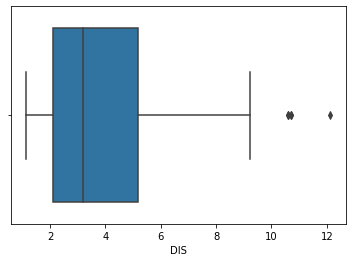

In [10]:
# Box Plot
import seaborn as sns
sns.boxplot(df_boston['DIS'])


In the above graph, can clearly see that values above 10 are acting as the outliers.

In [11]:
import numpy as np

# Position of the Outlier
print(np.where(df_boston['DIS']>10))


(array([351, 352, 353, 354, 355]),)


Example 2: Using ScatterPlot.


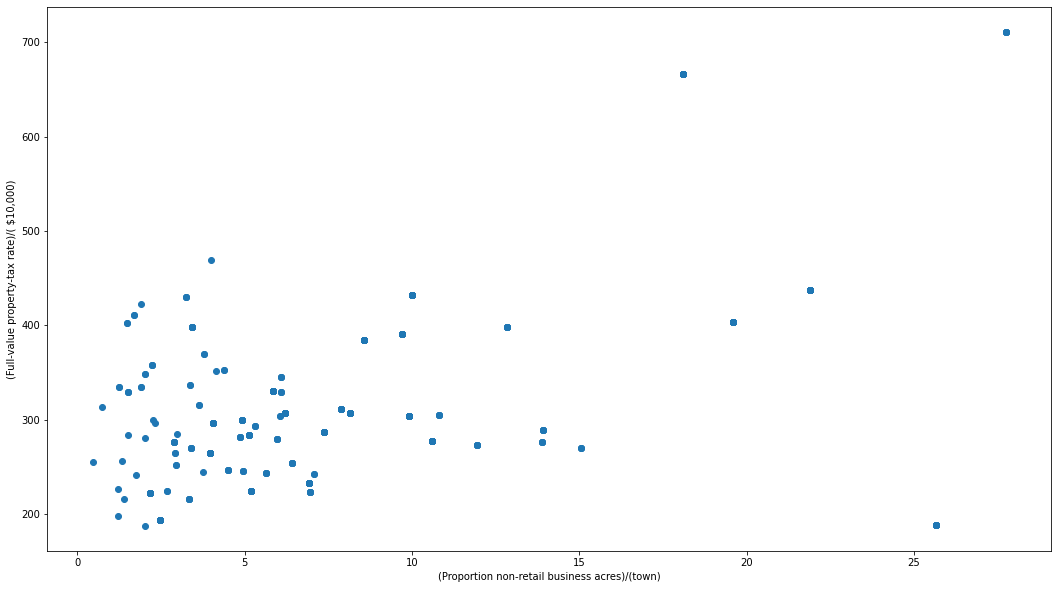

In [12]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df_boston['INDUS'], df_boston['TAX'])

# x-axis label
ax.set_xlabel('(Proportion non-retail business acres)/(town)')

# y-axis label
ax.set_ylabel('(Full-value property-tax rate)/( $10,000)')
plt.show()


Looking at the graph can summarize that most of the data points are in the bottom left corner of the graph but there are few points that are exactly;y opposite that is the top right corner of the graph. Those points in the top right corner can be regarded as Outliers.

Using approximation can say all those data points that are x>20 and y>600 are outliers. The following code can fetch the exact position of all those points that satisfy these conditions.

In [13]:
# Position of the Outlier
print(np.where((df_boston['INDUS']>20) & (df_boston['TAX']>600)))


(array([488, 489, 490, 491, 492]),)


##2. Z-score

Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.

Zscore = (data_point -mean) / std. deviation

In [14]:
# Z score
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df_boston['DIS']))

threshold = 3

# Position of the outlier
print(np.where(z > 3))


(array([351, 352, 353, 354, 355]),)


## 3. IQR (Inter Quartile Range)

IQR (Inter Quartile Range) Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field

In [15]:
# IQR
Q1 = np.percentile(df_boston['DIS'], 25)

Q3 = np.percentile(df_boston['DIS'], 75)
IQR = Q3 - Q1
IQR

3.0882500000000004

To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

upper = Q3 +1.5*IQR

lower = Q1 – 1.5*IQR

In [16]:
# Above Upper bound
upper = df_boston['DIS'] >= (Q3+1.5*IQR)

print("Upper bound:",upper)
print(np.where(upper))

# Below Lower bound
lower = df_boston['DIS'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))


Upper bound: 0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: DIS, Length: 506, dtype: bool
(array([351, 352, 353, 354, 355]),)
Lower bound: 0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: DIS, Length: 506, dtype: bool
(array([], dtype=int64),)


# Removing the outliers

In [17]:

print("Old Shape: ", df_boston.shape)

# Upper bound
upper = np.where(df_boston['DIS'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df_boston['DIS'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
df_boston.drop(upper[0], inplace = True)
df_boston.drop(lower[0], inplace = True)

print("New Shape: ", df_boston.shape)


Old Shape:  (506, 13)
New Shape:  (501, 13)


# Quantile based flooring and capping
In similar way outliers can be replaced with mean or Median 

In [18]:
#Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(df_boston['TAX'], 10)
ninetieth_percentile = np.percentile(df_boston['TAX'], 90)
# print(tenth_percentile, ninetieth_percentile)
b = np.where(df_boston['TAX']<tenth_percentile, tenth_percentile, df_boston['TAX'])
b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
# print("Sample:", sample)
print("New array:",b)#

New array: [296. 242. 242. 233. 233. 233. 311. 311. 311. 311. 311. 311. 311. 307.
 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307.
 307. 307. 307. 307. 307. 307. 307. 279. 279. 279. 279. 252. 252. 233.
 233. 233. 233. 233. 233. 233. 233. 233. 243. 243. 243. 243. 469. 233.
 313. 256. 284. 284. 284. 284. 284. 284. 233. 337. 337. 345. 345. 345.
 305. 305. 305. 305. 398. 398. 398. 398. 398. 398. 281. 281. 281. 281.
 247. 247. 247. 247. 270. 270. 270. 270. 270. 270. 270. 276. 276. 276.
 276. 276. 384. 384. 384. 384. 384. 384. 384. 384. 384. 384. 384. 432.
 432. 432. 432. 432. 432. 432. 432. 432. 233. 233. 233. 233. 233. 233.
 233. 437. 437. 437. 437. 437. 437. 437. 437. 437. 437. 437. 437. 437.
 437. 437. 403. 403. 403. 403. 403. 403. 403. 403. 403. 403. 403. 403.
 403. 403. 403. 403. 403. 403. 403. 403. 403. 403. 403. 403. 403. 403.
 403. 403. 403. 403. 296. 296. 296. 296. 296. 296. 296. 233. 233. 233.
 233. 233. 233. 233. 233. 398. 398. 398. 398. 398. 398. 265. 265. 